【問題1】NLP復習

In [1]:
import MeCab
import re

In [2]:
# jsonを扱うライブラリ
import json

f = open('./slack_data/2019-01-ai.json', 'r')
# jsonをdict型に変換
sample_dict_from_json = json.load(f)
# fiel開いたら閉じる
f.close()
# どのような構造になっているかを確認してください
print(sample_dict_from_json.keys())

dict_keys(['ok', 'messages', 'has_more', 'is_limited'])


データを観察

In [3]:
sample_dict_from_json['messages']

[{'client_msg_id': '6f87c23f-cead-4eb0-b814-89adc7173025',
  'type': 'message',
  'text': '腹痛のため遅れます。',
  'user': 'UEG9UR1AM',
  'ts': '1554425975.002100',
  'reactions': [{'name': 'annoying_dog', 'users': ['U9SL33S1M'], 'count': 1}]},
 {'client_msg_id': 'B36D189F-05E1-42AD-9878-27C7A6097CEE',
  'type': 'message',
  'text': '<https://www.facebook.com/yoshiki.shimamoto/posts/2235648403161371>',
  'user': 'UEVMB7YDN',
  'ts': '1554423870.001200',
  'attachments': [{'title': 'Yoshiki Shimamoto',
    'title_link': 'https://www.facebook.com/yoshiki.shimamoto/posts/2235648403161371',
    'text': '【祝！Yahoo!ニュースに掲載されました！】 当社の世界初・液体画像認識AI「DeepLiquid」（ディープリキッド）がYahoo!ニュースに掲載されました！ -------- この水質管理を、カメラとディープラーニング（深層学習）でできないか──こんなことに着目したベンチャー企業AnyTech（東京都渋谷区）が、水質を判定できるAI（人工知能）を開発した。...',
    'fallback': 'Yoshiki Shimamoto',
    'image_url': 'https://external-iad3-1.xx.fbcdn.net/safe_image.php?d=AQDvvrDhOnG-g-dB&w=400&h=400&url=https%3A%2F%2Flpt.c.yimg.jp%2Famd%2F20190404-00000048-zdn_n-000-view.jpg

遅れる報告が多い

In [4]:
sample_dict_from_json['messages'][0].keys()

dict_keys(['client_msg_id', 'type', 'text', 'user', 'ts', 'reactions'])

'message'のリストにはまた'client_msg_id', 'type', 'text', 'user', 'ts', 'reactions'をkeyとする辞書が入ってる
json_fileは辞書をリストにしたものがvalueになっている辞書

全てのfileの呼び出し

In [5]:
f = open('slack_data/2019-01-ai.json', 'r')
ai01dict_from_json = json.load(f)
f.close()
print(ai01dict_from_json.keys())

dict_keys(['ok', 'messages', 'has_more', 'is_limited'])


In [6]:
f = open('slack_data/global.json', 'r')
globaldict_from_json = json.load(f)
f.close()
print(globaldict_from_json.keys())

dict_keys(['ok', 'messages', 'has_more', 'is_limited'])


In [7]:
f = open('slack_data/random.json', 'r')
randdict_from_json = json.load(f)
f.close()
print(randdict_from_json.keys())

dict_keys(['ok', 'messages', 'has_more', 'is_limited'])


json['messages']のリスト1つ1つに入っている辞書のtextを抜き出して結合する

In [8]:
ai01text = []
globtest = []
randtext = []
for dic in ai01dict_from_json["messages"]:
    text = dic["text"]
    ai01text += [text]
for dic in globaldict_from_json["messages"]:
    text = dic["text"]
    globtest += [text]
for dic in randdict_from_json["messages"]:
    text = dic["text"]
    randtext += [text]

In [9]:
alltext = ai01text + globtest + randtext

クリーニングする

In [10]:
c_text = []
for text in alltext:
    BAD_SYMBOL = re.compile(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#亜-熙ぁ-んァ-ヶ]+)")
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile('[\n*`\s\＊]')
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile('<.{0,20}>')
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile('【.{1,20}】')
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile(':.{1,20}:')
    text = re.sub(BAD_SYMBOL, '', text)
    c_text += [text]

In [11]:
mecab = MeCab.Tagger('-Owakati')
words = []
for text in c_text:
    parse = mecab.parse(text)
    word = parse.split()
    #print(word)
    words += word
print(words)

['腹痛', 'の', 'ため', '遅れ', 'ます', '。', '1', '時間', 'ほど', 'おくれ', 'ます', '！', 'すいません', '、', '10', '分', '程', '遅れ', 'ます', 'だい', 'ご', 'ー', '！', '！', 'あっ', 'たら', 'で', '構い', 'ませ', 'ん', '！', '無かっ', 'たら', '嫁', 'の', '会社', 'に', 'ある', 'かも', 'な', 'ので', 'それ', 'で', '行き', 'ます', '！', '木村', 'さん', 'が', '参加', 'し', 'て', 'くれる', 'そう', 'な', 'ので', '求め', 'て', 'ます', '！', 'dic', 'に', 'ai', 'エクスポ', 'の', '招待', '券', 'まだ', 'あり', 'ます', 'か', '？', '？', '論文', 'を', 'web', 'に', '変換', 'し', 'て', 'くれる', 'やつ', '窪田', 'さん', 'が', '今', 'から', '行く', 'の', 'ここ', '気', 'を', 'つけ', 'て', 'ください', '！', '下', 'は', '修正', '済み', 'transform', '=', 'transforms', '.', 'Compose', '([', 'transforms', '.', 'ToTensor', '(),', 'transforms', '.', 'Normalize', '((', '0', '.', '5', ',),(', '0', '.', '5', ',))])', '復活', 'し', 'た', 'ので', '行き', 'ます', '！', '15', '時', 'に', '着き', 'ます', '。', '送り', 'ます', '。', '発表', 'の', 'PDF', 'こちら', 'に', 'あげ', 'て', '下さ', 'あい', 'いえいえ', '、', '体', 'が', '一番', 'です', '！', '大変', 'でしょ', 'う', 'が', '、', '僕', 'で', 'よけれ', 'ば', 'いつ', 'でも', '相談', '乗り'

In [12]:
#全単語数
len(words)

7976

In [13]:
# 種類のカウント
from collections import Counter
cont = Counter(words)

In [14]:
# 降順にする
sorted(cont.items(), key=lambda x:x[1], reverse=True)

[('の', 412),
 ('、', 293),
 ('を', 238),
 ('。', 213),
 ('に', 196),
 ('て', 181),
 ('！', 164),
 ('ます', 151),
 ('は', 131),
 ('が', 127),
 ('で', 122),
 ('し', 121),
 ('た', 121),
 ('です', 110),
 ('と', 85),
 ('まし', 64),
 ('/', 58),
 ('も', 53),
 ('から', 48),
 ('ご', 47),
 ('4', 42),
 ('な', 40),
 ('い', 38),
 ('方', 35),
 ('か', 34),
 ('DIVEINTOCODE', 34),
 ('さん', 33),
 ('する', 33),
 ('ルワンダ', 33),
 ('アフリカ', 32),
 ('者', 32),
 ('参加', 31),
 ('さ', 31),
 ('いる', 31),
 ('hasjoinedthechannel', 30),
 ('「', 29),
 ('」', 29),
 ('プロジェクト', 28),
 ('こと', 26),
 ('れ', 26),
 ('皆さん', 26),
 ('生', 25),
 ('・', 23),
 ('月', 22),
 ('や', 22),
 ('ない', 21),
 ('エンジニア', 21),
 ('よう', 21),
 ('教育', 21),
 ('受講', 21),
 ('ください', 20),
 ('人', 20),
 ('まで', 20),
 ('IT', 20),
 ('お願い', 19),
 ('（', 19),
 ('DEMODAY', 19),
 ('）', 18),
 ('-', 18),
 ('支援', 18),
 ('ぜひ', 18),
 ('：', 18),
 ('…', 18),
 ('ため', 17),
 ('ん', 17),
 ('？', 17),
 ('いたし', 17),
 ('本日', 17),
 ('個人', 17),
 ('(', 17),
 ('へ', 17),
 ('たい', 17),
 ('コース', 17),
 ('ビジネス', 17),
 ('登壇', 17),


【問題2】WordCloud

In [15]:
from wordcloud import WordCloud

In [16]:
long_text = ""
for word in words:
    long_text += ' '+ word
print(long_text)

 腹痛 の ため 遅れ ます 。 1 時間 ほど おくれ ます ！ すいません 、 10 分 程 遅れ ます だい ご ー ！ ！ あっ たら で 構い ませ ん ！ 無かっ たら 嫁 の 会社 に ある かも な ので それ で 行き ます ！ 木村 さん が 参加 し て くれる そう な ので 求め て ます ！ dic に ai エクスポ の 招待 券 まだ あり ます か ？ ？ 論文 を web に 変換 し て くれる やつ 窪田 さん が 今 から 行く の ここ 気 を つけ て ください ！ 下 は 修正 済み transform = transforms . Compose ([ transforms . ToTensor (), transforms . Normalize (( 0 . 5 ,),( 0 . 5 ,))]) 復活 し た ので 行き ます ！ 15 時 に 着き ます 。 送り ます 。 発表 の PDF こちら に あげ て 下さ あい いえいえ 、 体 が 一番 です ！ 大変 でしょ う が 、 僕 で よけれ ば いつ でも 相談 乗り ます ！ 今日 の やつ すいません 、 遅刻 です 今日 お 休み し ます 。 食事 ミス って アレルギー で 嘔吐 が 止まら ない だけ な ので 、 連休 は し ませ ん ！ 金曜 は 行き ます 。 相談 に 乗っ て 頂く お願い を し て た のに 、 すみません 。 4 月 期 生 の 明日 の 自己 紹介 スライド です ！ よろしく お願い いたし ます る 。 今日 、 たどり着け ちゃい そう です 。 朝 から 現れ ます が 驚か ない で ください mm 了解 いたし まし た 。 気 を つけ て 来 て 下さい 。 すみません 。 電車 の 遅延 により 遅れ ます 。 まだ 動く 気配 が ない ので どの くらい 遅れる か は わかり ませ ん 。 同じく おくれ ます すいません 20 分 ほど 遅れ そう です remon を 漫画 化 動画 を 漫画 に 変換 する サービス DSN で の キー フレーム 抽出 と GAN で の スタイル 変換 了解 です ！ すいません 、 昼 から 行き ます 本日 終 会 は 17 : 

In [17]:
stop = [ "!",  "。", "、", "(", ")", "/", "-",
       "ます", "です", "さん", "から", "まし", "する", "こと", "いる", "ない", "まで", "たい"]

In [18]:
wordcloud = WordCloud(width=800,
                      stopwords= stop,
                      font_path="C:/Users/umini/Anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/ipagp.ttf",
                      height=600).generate(long_text)

In [19]:
wordcloud.to_file("./wordcloud_sample.png")

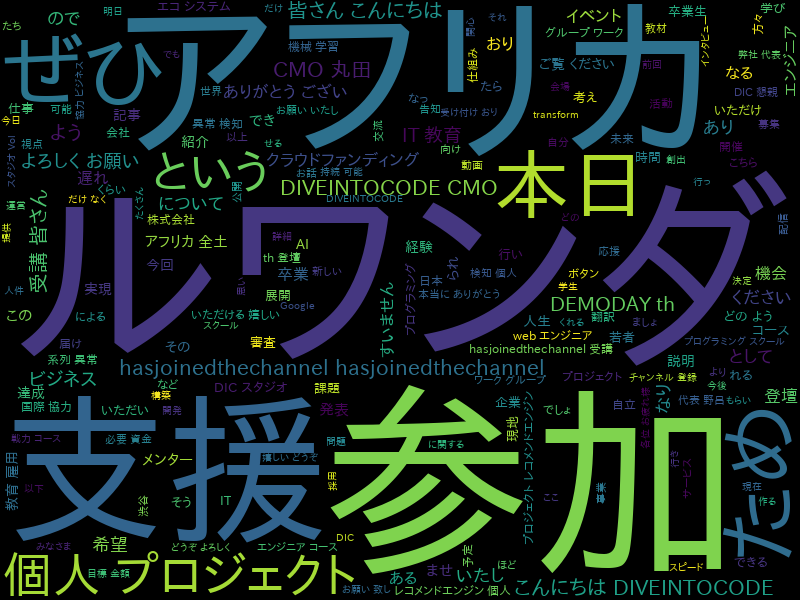

In [20]:
from IPython.display import Image, display_png
display_png(Image("wordcloud_sample.png"))

【問題3】あの人はどんな人

In [21]:
# ユーザー名を取得
f = open('slack_data/users_dict.json', 'r')
userdict_from_json = json.load(f)
f.close()
print(userdict_from_json.keys())
userdict_from_json

dict_keys(['U0CGPM9T2', 'U5WEHDZRC', 'U71KZN0HL', 'U7MLFT82K', 'U9SL33S1M', 'UCFCLSRCK', 'UEG9UR1AM', 'UEHD8A6H3', 'UEJ7TBV0R', 'UEJA5HS3G', 'UEVMB7YDN', 'UF1A4QA10', 'UF1KE2X8B', 'UG0P51PNC'])


{'U0CGPM9T2': 'Hiroyoshi Noro',
 'U5WEHDZRC': 'mentor_tatsuya_suzuki',
 'U71KZN0HL': 'mentor_tetsuro_nishio',
 'U7MLFT82K': 'mentor Shun Nakamura',
 'U9SL33S1M': 'yoshiko_endo',
 'UCFCLSRCK': 'mano_hironobu',
 'UEG9UR1AM': 'noritsugu_yamada',
 'UEHD8A6H3': 'yasunori_kimura',
 'UEJ7TBV0R': 'Kazuki_Egusa',
 'UEJA5HS3G': 'moriyasu_komiya',
 'UEVMB7YDN': 'Yohei Kawakami',
 'UF1A4QA10': 'naoki_sasaki',
 'UF1KE2X8B': 'Ayako Nonaka',
 'UG0P51PNC': 'kiyoshige.goto'}

In [22]:
from janome.tokenizer import Tokenizer
t = Tokenizer()

In [23]:
def cojin_text(user):
    cojintext = []
    for dic in ai01dict_from_json["messages"]:
        text = dic["text"]
        if dic["user"] == user:
            cojintext += [text]
    for dic in globaldict_from_json["messages"]:
        text = dic["text"]
        if dic["user"] == user:
            cojintext += [text]
    for dic in randdict_from_json["messages"]:
        text = dic["text"]
        if dic["user"] == user:
            cojintext += [text]
    return cojintext

def clearn_text(alltext):
    c_text = []
    for text in alltext:
        BAD_SYMBOL = re.compile(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#亜-熙ぁ-んァ-ヶ]+)")
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('[\n*`\s\＊]')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('<.{0,20}>')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('【.{1,20}】')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile(':.{1,20}:')
        text = re.sub(BAD_SYMBOL, '', text)
        c_text += [text]
    return c_text

def nukidasi(c_text):
    t = Tokenizer()
    b_list = []
    doc_list = []
    for text in c_text:
        token = t.tokenize(text)
        do_list = []
        do_list += [word.surface for word in token if word.part_of_speech.split(',')[0] in ['名詞', '動詞','形容詞']]
        doc_list += do_list
        b_list += [do_list]
    cont = Counter(doc_list)
    print(sorted(cont.items(), key=lambda x:x[1], reverse=True))

def matome(user):
    a = cojin_text(user)
    a = clearn_text(a)
    print("ユーザーネーム: {} さんの発言単語降順".format(userdict_from_json[user]))
    nukidasi(a)

In [24]:
matome('U0CGPM9T2')

ユーザーネーム: Hiroyoshi Noro さんの発言単語降順
[('し', 50), ('ルワンダ', 27), ('アフリカ', 23), ('IT', 20), ('教育', 17), ('する', 16), ('支援', 15), ('い', 15), ('円', 13), ('人', 13), ('こと', 12), ('年', 11), ('ビジネス', 11), ('さ', 10), (',', 10), ('全土', 9), ('プロジェクト', 9), ('いる', 9), ('雇用', 8), ('希望', 8), ('私', 8), ('万', 8), ('月', 8), ('卒業', 8), ('000', 8), ('可能', 7), ('機会', 7), ('エコ', 7), ('システム', 7), ('ため', 7), ('方', 7), ('おり', 7), ('現地', 7), ('いただけ', 6), ('持続', 6), ('若者', 6), ('自立', 6), ('ください', 6), ('よう', 6), ('学び', 6), ('実現', 6), ('必要', 6), ('資金', 6), ('活動', 6), ('の', 6), ('仕事', 6), ('国', 6), ('的', 6), ('(', 6), ('2019', 6), ('費', 6), ('達成', 5), ('DIVEINTOCODE', 5), ('き', 5), ('お願い', 5), ('日', 5), ('仕組み', 5), ('れ', 5), ('プログラミング', 5), ('スクール', 5), ('6', 5), ('せる', 4), ('未来', 4), ('目標', 4), ('金額', 4), ('みなさま', 4), ('300', 4), ('いたし', 4), ('クラウドファンディング', 4), ('事業', 4), ('展開', 4), ('発表', 4), ('協力', 4), ('1', 4), ('コース', 4), ('提供', 4), ('世界', 4), ('なり', 4), ('なる', 4), ('4', 4), ('エンジニア', 4), ('課題', 4), ('卒業生', 4), ('企

【問題4】誰が一番かまってもらってる

In [25]:
readict = {}
for dic in ai01dict_from_json["messages"]:
    user = userdict_from_json[dic["user"]]
    try:
        for reaction in dic["reactions"]:
            if user in reaction.keys():
                readict[user] = readict[user] + reaction["count"]
            else:
                readict[user] =  reaction["count"]
    except KeyError:
        continue

In [26]:
#リアクションもらってる辞書！
readict

{'noritsugu_yamada': 2,
 'Yohei Kawakami': 1,
 'Kazuki_Egusa': 2,
 'Ayako Nonaka': 1,
 'moriyasu_komiya': 2,
 'naoki_sasaki': 1,
 'mentor Shun Nakamura': 1,
 'kiyoshige.goto': 1}

【問題5】Mr.Noro or Not Mr.Noro

In [27]:
norotext = cojin_text("U0CGPM9T2")
norotext = clearn_text(norotext)

In [28]:
def not_noro(user):
    cojintext = []
    for dic in ai01dict_from_json["messages"]:
        text = dic["text"]
        if dic["user"] is not user:
            cojintext += [text]
    for dic in globaldict_from_json["messages"]:
        text = dic["text"]
        if dic["user"] is not user:
            cojintext += [text]
    for dic in randdict_from_json["messages"]:
        text = dic["text"]
        if dic["user"]  is not user:
            cojintext += [text]
    return cojintext

In [29]:
def wakati(c_text):
    corpus = []
    for i in range(len(c_text)):
        a = t.tokenize(c_text[i], wakati=True)
        corpus += [a]
    return corpus

In [30]:
norotext = cojin_text("U0CGPM9T2")
norotext = clearn_text(norotext)
norotext = wakati(norotext)
not_norotext = not_noro("U0CGPM9T2")
not_norotext = clearn_text(not_norotext)
not_norotext = wakati(not_norotext)
context = norotext + not_norotext

In [31]:
import numpy as np
ytrain = np.hstack((np.ones(len(norotext)), np.zeros(len(not_norotext))))

In [32]:
#数値変換辞書作成
norodict = {}
count = 1
for text in context:
    for tango in text:
        if  tango in norodict.keys():
            pass
        else:
            norodict[tango] = count
            count += 1

In [33]:
maxlen = 0
for text in context:
    if len(text) > maxlen:
        maxlen = len(text)

In [34]:
#数値変換とゼロうめ
context_ar = np.empty((0, maxlen))
for text in context:
    leng = len(text)
    texts = np.zeros(maxlen)#zeroうめ
    for i, tango in enumerate(text):
        texts[i + maxlen - leng] = norodict[tango] #数値変換
    context_ar = np.vstack((context_ar, texts))

In [35]:
#中身ないアレーは消す
delind = np.where(np.max(context_ar, axis=1) == 0)[0]
context_ar = np.delete(context_ar, delind, axis=0)
ytrain = np.delete(ytrain, delind)

In [36]:
import keras
from keras.layers.embeddings import Embedding
from keras.layers import Input, Dense, GRU
from keras.models import Model

Using TensorFlow backend.


In [37]:
input_dim = max(norodict.values()) +1

In [38]:
#モデル構築
imp = Input(shape=(None,))
z = Embedding(input_dim, 150, mask_zero=True)(imp)
z = GRU(150)(z)
z = Dense(100)(z)
out = Dense(1, activation="sigmoid")(z)

model = Model(imp, out)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 150)         255750    
_________________________________________________________________
gru_1 (GRU)                  (None, 150)               135450    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 406,401
Trainable params: 406,401
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(context_ar, ytrain, batch_size=19 ,epochs=15)

Epoch 1/15
189/189 [==============================] - 10s 52ms/step - loss: 0.6359 - acc: 0.7937
Epoch 2/15
189/189 [==============================] - 8s 42ms/step - loss: 0.5210 - acc: 0.8148
Epoch 3/15
189/189 [==============================] - 8s 42ms/step - loss: 0.4253 - acc: 0.8148
Epoch 4/15
189/189 [==============================] - 8s 41ms/step - loss: 0.3783 - acc: 0.8095
Epoch 5/15
189/189 [==============================] - 8s 42ms/step - loss: 0.3486 - acc: 0.7989
Epoch 6/15
189/189 [==============================] - 8s 42ms/step - loss: 0.3238 - acc: 0.8201
Epoch 7/15
189/189 [==============================] - 8s 42ms/step - loss: 0.3166 - acc: 0.8042
Epoch 8/15
189/189 [==============================] - 8s 42ms/step - loss: 0.2855 - acc: 0.7884
Epoch 9/15
189/189 [==============================] - 8s 41ms/step - loss: 0.2989 - acc: 0.7989
Epoch 10/15
189/189 [==============================] - 8s 42ms/step - loss: 0.2840 - acc: 0.7884
Epoch 11/15
189/189 [=================

In [43]:
test =["明日、機械学習エンジニア向け就職説明会、開催します!"]

In [48]:
test = ["＊【再々掲：スペシャル特典】有償のRubyMineやPyCharmの ｀6ヶ月間100%OFFクーポン｀ がまだ30名様分残っています！＊欲しい方は、スタンプをお願いします！"]

In [49]:
test = clearn_text(test)
test = wakati(test)
texts = np.zeros(len(test[0]))#zeroうめ
for test1 in test:
    for i, tango in enumerate(test1):
        try:
            texts[i] = norodict[tango] #数値変換
        except KeyError:
            continue

In [50]:
test_ar = np.array(texts).reshape(1,-1)

In [52]:
model.predict(test_ar)

array([[0.18665278]], dtype=float32)